# INFOM232 : "Deep learning et machine learning avancé" !
Cette compétition consiste en une tâche de classification d'images. Et plus précisément, des images de feuilles ! En effet, le dataset qui vous est fourni consiste en un ensemble de feuilles auxquelles peut être assigné un label parmis 39 catégories différentes. Chaque catégorie indique l'espèce de la plante et indique également si la feuille est saine, ou si celle-ci présente une maladie et laquelle !

In [2]:
import pandas as pd

# Chemin du fichier CSV
file_path = 'train.csv'

# 
train_df = pd.read_csv(file_path)

# Affichage des premières lignes pour comprendre la structure des données
train_df.head()


,Id,Path,Disease (target)
0,bd9b5f7e-77ad-4724-8434-bc00eb287492,train/apple___apple_scab/bd9b5f7e-77ad-4724-84...,apple___apple_scab
1,ca37a783-d311-4c31-96fa-442dc93945af,train/apple___apple_scab/ca37a783-d311-4c31-96...,apple___apple_scab
2,cdb0b480-e142-455b-9a84-55af717f33b4,train/apple___apple_scab/cdb0b480-e142-455b-9a...,apple___apple_scab
3,ad1b7243-a55e-48dc-8dc8-b82855839afa,train/apple___apple_scab/ad1b7243-a55e-48dc-8d...,apple___apple_scab
4,3064193c-1573-47e1-b946-141ae22d8b4b,train/apple___apple_scab/3064193c-1573-47e1-b9...,apple___apple_scab


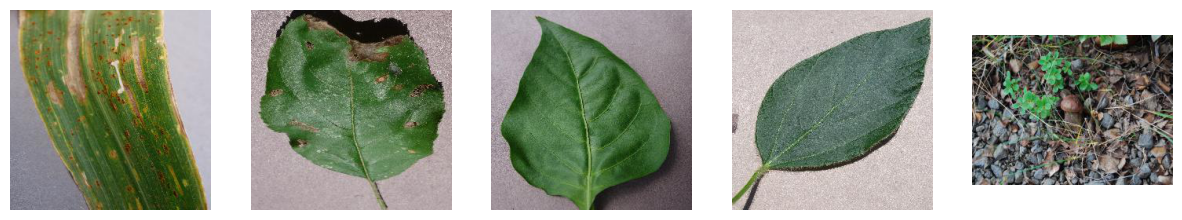

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

train_df = pd.read_csv('train.csv')

# Sélection d'un échantillon de chemins d'images
sample_images = train_df['Path'].sample(n=5).tolist()


plt.figure(figsize=(15, 10))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


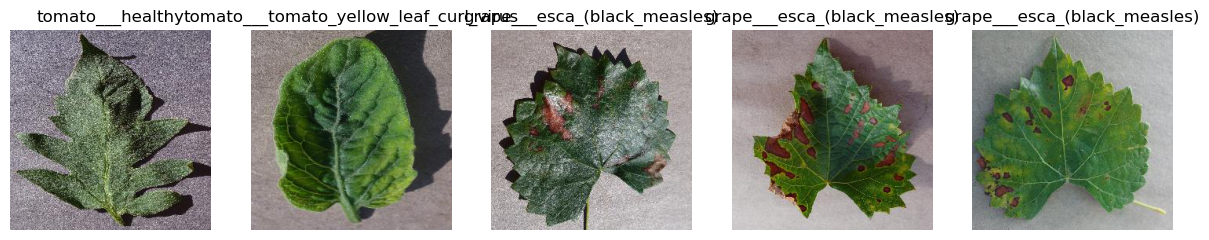

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


train_df = pd.read_csv('train.csv')


sample_data = train_df.sample(n=5)

# Affichage des images avec leurs étiquettes
plt.figure(figsize=(15, 10))
for i, (img_path, label) in enumerate(zip(sample_data['Path'], sample_data['Disease (target)'])):
    
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.show()


In [5]:
import pandas as pd
from PIL import Image
import os


train_df = pd.read_csv('train.csv')

# Initialiser une liste pour stocker les tailles des images
image_sizes = []

# Parcourir chaque chemin d'image et obtenir sa taille
for img_path in train_df['Path']:
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # img.size retourne un tuple (largeur, hauteur)


train_df['Size'] = image_sizes

# Afficher les premières lignes 
print(train_df.head())


                                     Id  \
0  bd9b5f7e-77ad-4724-8434-bc00eb287492   
1  ca37a783-d311-4c31-96fa-442dc93945af   
2  cdb0b480-e142-455b-9a84-55af717f33b4   
3  ad1b7243-a55e-48dc-8dc8-b82855839afa   
4  3064193c-1573-47e1-b946-141ae22d8b4b   

                                                Path    Disease (target)  \
0  train/apple___apple_scab/bd9b5f7e-77ad-4724-84...  apple___apple_scab   
1  train/apple___apple_scab/ca37a783-d311-4c31-96...  apple___apple_scab   
2  train/apple___apple_scab/cdb0b480-e142-455b-9a...  apple___apple_scab   
3  train/apple___apple_scab/ad1b7243-a55e-48dc-8d...  apple___apple_scab   
4  train/apple___apple_scab/3064193c-1573-47e1-b9...  apple___apple_scab   

         Size  
0  (256, 256)  
1  (256, 256)  
2  (256, 256)  
3  (256, 256)  
4  (256, 256)  


# dimension reduction 
Dans le domaine de l'apprentissage automatique et en particulier dans le traitement d'images, la gestion de la mémoire est un aspect crucial pour assurer l'efficacité et la viabilité des modèles. Lors du travail avec des ensembles de données d'images, une approche courante consiste à ajuster la taille des images pour équilibrer la précision du modèle et l'utilisation de la mémoire. Dans notre cas, bien que les images originales soient de taille 256x256 pixels, nous avons opté pour les redimensionner à 64x64 pixels. Cette décision est motivée principalement par des considérations de mémoire.Les images de plus grande taille nécessitent davantage de mémoire pour le stockage et le traitement, ce qui peut être particulièrement problématique lorsqu'on travaille avec de grands ensembles de données ou des ressources informatiques limitées. Le redimensionnement des images à une taille plus petite réduit la quantité de mémoire nécessaire pour chaque image, permettant ainsi de traiter un plus grand nombre d'images simultanément et de réduire le temps d'entraînement du modèle.

In [29]:
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 
df = pd.read_csv('train.csv')

# Initialiser la liste pour stocker les images
images = []

# Charger chaque image
for img_path in df['Path']:
    # Charger l'image à la taille de 256x256 pixels (il faut reduire a 128*128) nous passer à 64x64 pour raison de memoire
    img = load_img(img_path, target_size=(64, 64))
    img = img_to_array(img)
    images.append(img)

# Convertir en numpy array
images = np.array(images)
images = images / 255.0  # Normalisation des pixels ( impportant pour notre model)



# one-hot encoding
L'utilisation du one-hot encoding dans notre projet de classification d'images est une technique cruciale pour transformer les données catégorielles en un format qui peut être mieux interprété par les modèles de machine learning, en particulier les réseaux de neurones. Dans notre contexte, chaque image appartient à une certaine catégorie de maladie de plante, et ces catégories sont initialement représentées par des étiquettes textuelles . Le one-hot encoding convertit ces étiquettes en vecteurs binaires où chaque élément représente une catégorie distincte. Par exemple, spour les 39 maladies différentes, chaque maladie sera représentée par un vecteur de 39 éléments, avec un '1' à la position correspondant à la maladie spécifique de l'image, et '0' partout ailleurs

Cette méthode de représentation des étiquettes est particulièrement bénéfique pour les modèles de classification, car elle élimine toute hiérarchie artificielle ou relation d'ordre entre les catégories, qui pourrait être mal interprétée par le modèle. En outre, elle facilite la tâche du réseau de neurones en fournissant une cible claire et distincte pour chaque classe, aidant ainsi à améliorer la précision et l'efficacité du processus d'apprentissage

In [30]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#  df['Disease (target)'] contient vos labels textuels
labels = df['Disease (target)'].values

# Encodage des labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoded = to_categorical(integer_encoded)




In [31]:
# Afficher quelques labels encodés et leurs représentations one-hot
print("Exemple de labels et leur encodage one-hot:")
for i in range(5):
    print(f"Label original: {labels[i]}, Label encodé: {integer_encoded[i]}, One-hot: {onehot_encoded[i]}")

# Afficher le mapping entre les labels textuels et leur représentation numérique
print("\nMapping des labels textuels vers les labels numériques:")
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")


Exemple de labels et leur encodage one-hot:
Label original: apple___apple_scab, Label encodé: 0, One-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label original: apple___apple_scab, Label encodé: 0, One-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label original: apple___apple_scab, Label encodé: 0, One-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label original: apple___apple_scab, Label encodé: 0, One-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label original: apple___apple_scab, Label encodé: 0, One-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Mapping des labels textuels vers les labels n

# L'utilisation d'un modèle de réseau de neurones convolutifs (CNN) 
Dans notre modèle, chaque couche convolutive applique différents filtres pour détecter des motifs spécifiques tels que les bords, les textures, ou d'autres éléments visuels pertinents. En empilant plusieurs de ces couches, notre réseau peut identifier des caractéristiques de plus en plus complexes et abstraites, ce qui est essentiel pour reconnaître avec précision les différentes maladies de plantes à partir des images. De plus, en intégrant des techniques comme la normalisation par lots et les activations ReLU, ainsi que le dropout pour la régularisation, le modèle est non seulement capable de capturer efficacement les détails cruciaux dans les images, mais aussi de généraliser ses apprentissages à de nouvelles données, minimisant ainsi le risque de surajustement. Ainsi, l'adoption d'un modèle CNN s'est avérée être une stratégie optimale, offrant à la fois précision et efficacité dans notre tâche de classification d'images.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Préparer les données
X = images 
y = onehot_encoded # 

# Séparation en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),  # Couche convolutive supplémentaire
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),  # Encore une autre couche
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(39, activation='softmax')  # 39 classes
])


# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
564/564 [==============================] - 28s 47ms/step - loss: 1.6147 - accuracy: 0.5380 - val_loss: 0.9636 - val_accuracy: 0.7186
Epoch 2/10
564/564 [==============================] - 18s 32ms/step - loss: 0.6610 - accuracy: 0.7909 - val_loss: 0.6338 - val_accuracy: 0.8069
Epoch 3/10
564/564 [==============================] - 15s 26ms/step - loss: 0.4199 - accuracy: 0.8618 - val_loss: 0.5077 - val_accuracy: 0.8400
Epoch 4/10
564/564 [==============================] - 15s 26ms/step - loss: 0.3044 - accuracy: 0.8988 - val_loss: 0.5356 - val_accuracy: 0.8440
Epoch 5/10
564/564 [==============================] - 15s 26ms/step - loss: 0.2171 - accuracy: 0.9267 - val_loss: 0.5290 - val_accuracy: 0.8531
Epoch 6/10
564/564 [==============================] - 15s 26ms/step - loss: 0.1490 - accuracy: 0.9483 - val_loss: 0.5581 - val_accuracy: 0.8542
Epoch 7/10
564/564 [==============================] - 15s 26ms/step - loss: 0.1434 - accuracy: 0.9518 - val_loss: 0.4871 - val_accuracy:

In [33]:
# Évaluation du modèle
evaluation = model.evaluate(X_val, y_val)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

# Enregistrement du modèle
model.save("mon_modele_de_classification.h5")


141/141 [==============================] - 1s 7ms/step - loss: 0.4582 - accuracy: 0.8915
Test Loss: 0.4582446813583374, Test Accuracy: 0.8914780020713806


C:\Users\MFE\.conda\envs\obspy\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

def create_and_train_model_with_kfold(images, onehot_encoded, k=5):
    # Initialize metrics
    accuracy_scores = []
    loss_scores = []

    # 
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(images):
        # Split data
        X_train, X_val = images[train_index], images[val_index]
        y_train, y_val = onehot_encoded[train_index], onehot_encoded[val_index]

        
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(39, activation='softmax')  # Assuming 39 classes
        ])

        
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

        
        accuracy_scores.append(history.history['val_accuracy'][-1])
        loss_scores.append(history.history['val_loss'][-1])

    #
    average_accuracy = np.mean(accuracy_scores)
    average_loss = np.mean(loss_scores)

    return model, average_accuracy, average_loss


In [38]:

k_folds = 10  
model, avg_accuracy, avg_loss = create_and_train_model_with_kfold(images, onehot_encoded, k=k_folds)
model.save('my_model.h5')  


Epoch 1/10
634/634 [==============================] - 19s 28ms/step - loss: 1.5243 - accuracy: 0.5595 - val_loss: 0.8336 - val_accuracy: 0.7439
Epoch 2/10
634/634 [==============================] - 17s 27ms/step - loss: 0.6202 - accuracy: 0.8012 - val_loss: 0.6124 - val_accuracy: 0.7980
Epoch 3/10
634/634 [==============================] - 17s 27ms/step - loss: 0.3984 - accuracy: 0.8694 - val_loss: 0.4615 - val_accuracy: 0.8540
Epoch 4/10
634/634 [==============================] - 17s 27ms/step - loss: 0.2803 - accuracy: 0.9076 - val_loss: 0.4153 - val_accuracy: 0.8713
Epoch 5/10
634/634 [==============================] - 17s 27ms/step - loss: 0.2068 - accuracy: 0.9297 - val_loss: 0.4897 - val_accuracy: 0.8424
Epoch 6/10
634/634 [==============================] - 17s 27ms/step - loss: 0.1489 - accuracy: 0.9492 - val_loss: 0.4067 - val_accuracy: 0.8797
Epoch 7/10
634/634 [==============================] - 17s 27ms/step - loss: 0.1191 - accuracy: 0.9615 - val_loss: 0.4962 - val_accuracy:

C:\Users\MFE\.conda\envs\obspy\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
avg_accuracy


0.8860480308532714

In [48]:
avg_loss

0.47227688431739806

In [11]:
import pandas as pd

# Charger le fichier CSV
test_df = pd.read_csv('test.csv')

# Afficher les premières lignes pour voir l'en-tête
print(test_df.head())


                                     Id  \
0  e3cf77fc-db4e-4475-bc64-7d8d1b3b1bea   
1  9f93ce59-518f-4876-b0fa-9d8586b1f296   
2  339378ca-594b-44ef-99e9-f006032f22da   
3  d003f849-7e9b-4279-b762-20898d37c0e8   
4  acbee275-4053-4c5b-9bac-49d98fbea2e7   

                                            Path  
0  test/e3cf77fc-db4e-4475-bc64-7d8d1b3b1bea.jpg  
1  test/9f93ce59-518f-4876-b0fa-9d8586b1f296.jpg  
2  test/339378ca-594b-44ef-99e9-f006032f22da.jpg  
3  test/d003f849-7e9b-4279-b762-20898d37c0e8.jpg  
4  test/acbee275-4053-4c5b-9bac-49d98fbea2e7.jpg  


 charger les chemins des images de test à partir de test.csv et préparer ces images de la même manière que vous avez préparé les données d'entraînement

In [12]:
import os

# Chemin vers le dossier 'test'
test_folder_path = os.path.join('C:\\Users\\MFE\\OneDrive\\Unamur\\unamur-infom232-2023-2024', 'test')

# Vérifier si le dossier 'test' existe
if os.path.exists(test_folder_path):
    print(f"Le dossier existe : {test_folder_path}")
else:
    print(f"Le dossier n'existe pas : {test_folder_path}")

# Vérifier également l'existence du sous-dossier 'unknown'
unknown_folder_path = os.path.join(test_folder_path, 'unknown')
if os.path.exists(unknown_folder_path):
    print(f"Le sous-dossier existe : {unknown_folder_path}")
else:
    print(f"Le sous-dossier n'existe pas : {unknown_folder_path}")


Le dossier existe : C:\Users\MFE\OneDrive\Unamur\unamur-infom232-2023-2024\test
Le sous-dossier existe : C:\Users\MFE\OneDrive\Unamur\unamur-infom232-2023-2024\test\unknown


In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

test_images = []
for img_path in test_df['Path']:
    # Construction du chemin complet vers l'image
    full_path = os.path.join('C:\\Users\\MFE\\OneDrive\\Unamur\\unamur-infom232-2023-2024\\test\\unknown', img_path.split('/')[-1])
    
    if os.path.exists(full_path):
        img = load_img(full_path, target_size=(64, 64))
        img = img_to_array(img)
        test_images.append(img)
    else:
        print(f"Le fichier n'existe pas : {full_path}")


X_test = np.array(test_images)
X_test = X_test / 255.0


In [35]:
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model("mon_modele_de_classification.h5")

# Effectuer des prédictions sur les données de test
predictions = model.predict(X_test)

# Convertir les prédictions en étiquettes de classe
predicted_classes = np.argmax(predictions, axis=1)

#  convertir les indices de classe en étiquettes lisibles
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Afficher ou enregistrer les résultats
for i in range(10):  # Exemple : afficher les prédictions pour les 10 premières images
    print(f"Image {i}: Classe prédite - {predicted_labels[i]}")


1029/1029 [==============================] - 8s 7ms/step
Image 0: Classe prédite - apple___apple_scab
Image 1: Classe prédite - apple___apple_scab
Image 2: Classe prédite - apple___apple_scab
Image 3: Classe prédite - apple___apple_scab
Image 4: Classe prédite - apple___apple_scab
Image 5: Classe prédite - apple___apple_scab
Image 6: Classe prédite - apple___apple_scab
Image 7: Classe prédite - apple___apple_scab
Image 8: Classe prédite - background_without_leaves
Image 9: Classe prédite - apple___apple_scab


In [36]:
# Créer un DataFrame pour les résultats
results_df = pd.DataFrame({'Id': test_df['Id'], 'Disease (target)': predicted_labels})

# Enregistrer les résultats dans un fichier CSV
results_df.to_csv('submission.csv', index=False)


In [40]:
from tensorflow.keras.models import load_model


model = load_model("my_model.h5")


predictions = model.predict(X_test)

# 
predicted_classes = np.argmax(predictions, axis=1)

# 
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Afficher ou enregistrer les résultats
for i in range(10): 
    print(f"Image {i}: Classe prédite - {predicted_labels[i]}")


1029/1029 [==============================] - 7s 7ms/step
Image 0: Classe prédite - apple___apple_scab
Image 1: Classe prédite - apple___apple_scab
Image 2: Classe prédite - apple___apple_scab
Image 3: Classe prédite - blueberry___healthy
Image 4: Classe prédite - apple___apple_scab
Image 5: Classe prédite - apple___apple_scab
Image 6: Classe prédite - potato___late_blight
Image 7: Classe prédite - apple___apple_scab
Image 8: Classe prédite - apple___healthy
Image 9: Classe prédite - apple___apple_scab


In [41]:

results_df = pd.DataFrame({'Id': test_df['Id'], 'Disease (target)': predicted_labels})


results_df.to_csv('submissionKF.csv', index=False)


In [44]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

def create_and_train_model_with_kfold(images, onehot_encoded, k=5):
    all_val_accuracies = []
    all_val_losses = []

   
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(images):
     
        X_train, X_val = images[train_index], images[val_index]
        y_train, y_val = onehot_encoded[train_index], onehot_encoded[val_index]

        # Create model
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(39, activation='softmax')  #  39 classes
        ])

        #
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

    
        all_val_accuracies.append(history.history['val_accuracy'])
        all_val_losses.append(history.history['val_loss'])

    return model, all_val_accuracies, all_val_losses


Epoch 1/10
564/564 [==============================] - 16s 27ms/step - loss: 1.6359 - accuracy: 0.5287 - val_loss: 0.8680 - val_accuracy: 0.7366
Epoch 2/10
564/564 [==============================] - 15s 26ms/step - loss: 0.6974 - accuracy: 0.7770 - val_loss: 0.6045 - val_accuracy: 0.8047
Epoch 3/10
564/564 [==============================] - 14s 26ms/step - loss: 0.4399 - accuracy: 0.8566 - val_loss: 0.6441 - val_accuracy: 0.7992
Epoch 4/10
564/564 [==============================] - 15s 26ms/step - loss: 0.3093 - accuracy: 0.8961 - val_loss: 0.4655 - val_accuracy: 0.8597
Epoch 5/10
564/564 [==============================] - 14s 25ms/step - loss: 0.2423 - accuracy: 0.9191 - val_loss: 0.5415 - val_accuracy: 0.8433
Epoch 6/10
564/564 [==============================] - 14s 25ms/step - loss: 0.1564 - accuracy: 0.9472 - val_loss: 0.5055 - val_accuracy: 0.8668
Epoch 7/10
564/564 [==============================] - 14s 25ms/step - loss: 0.1464 - accuracy: 0.9493 - val_loss: 0.7033 - val_accuracy:

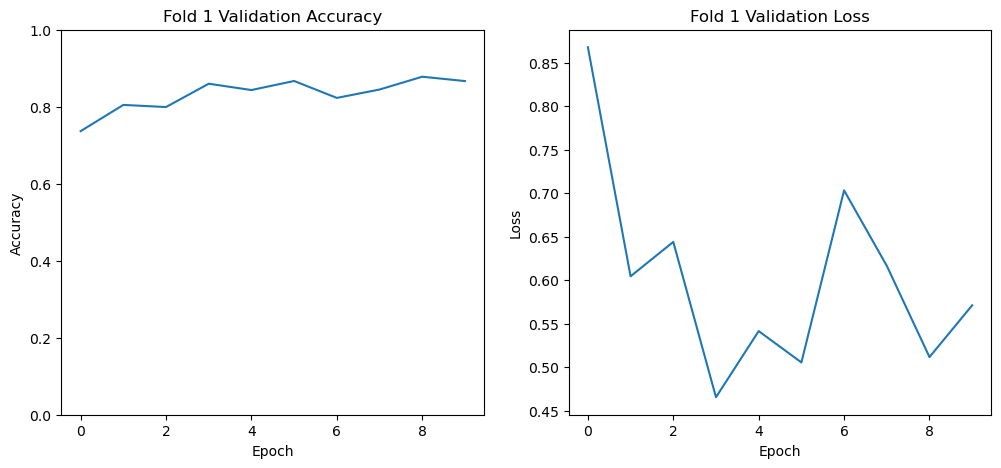

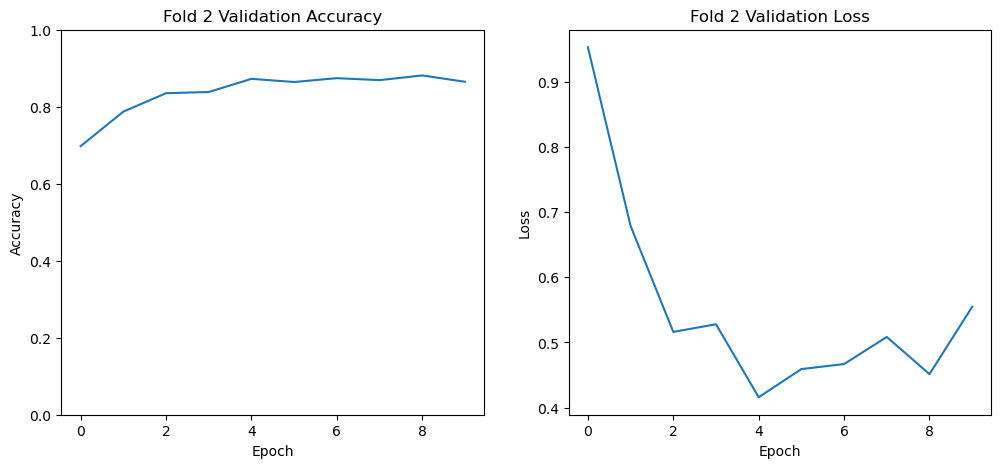

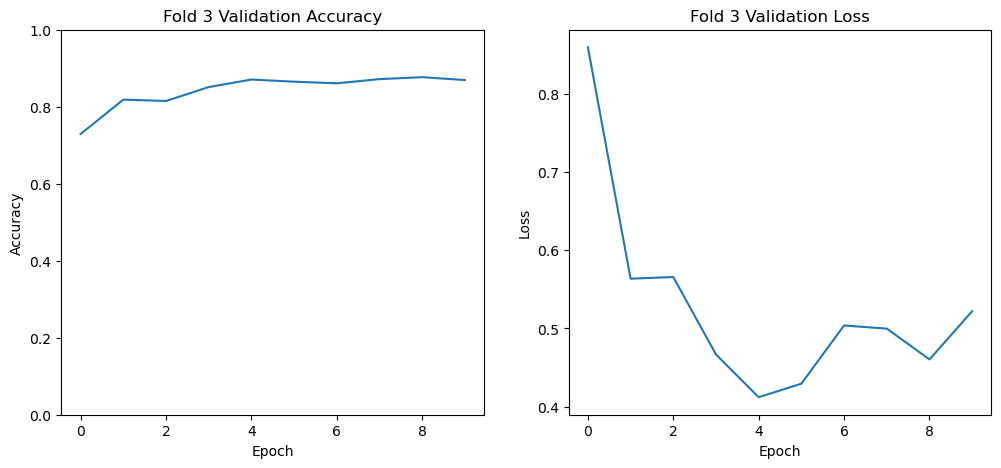

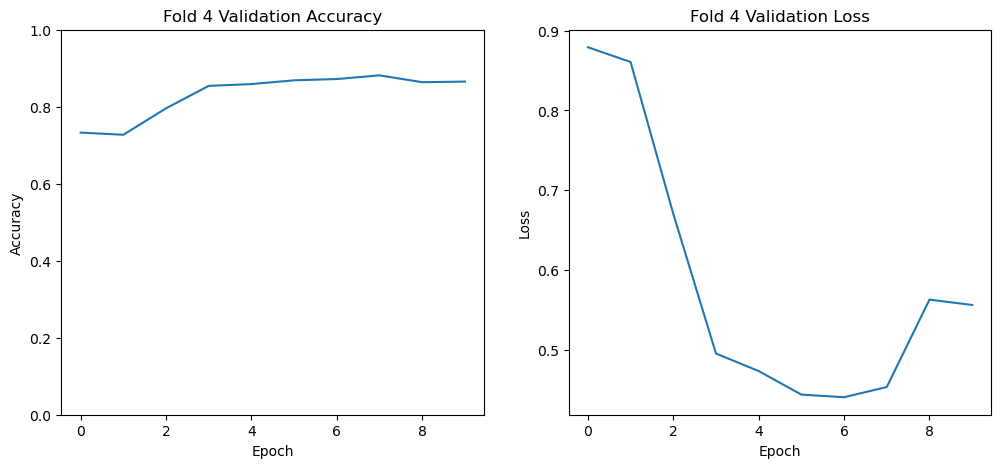

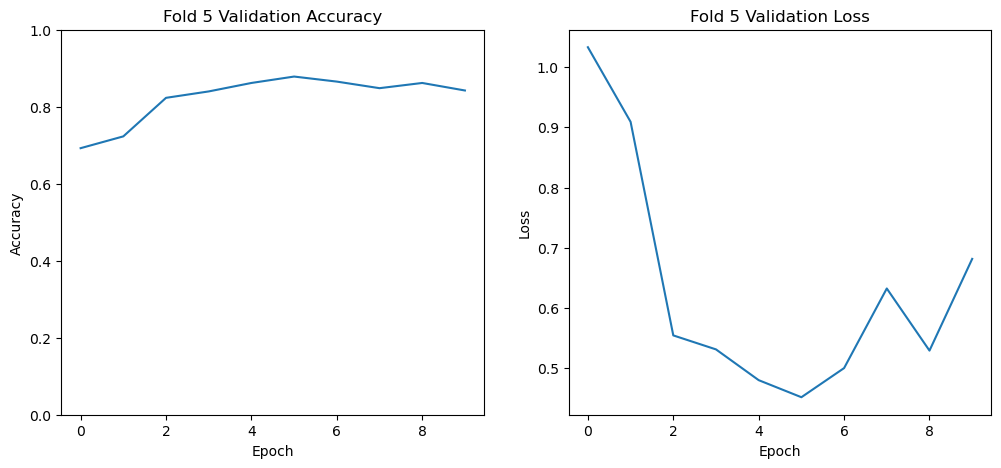

In [45]:
import matplotlib.pyplot as plt

model, val_accuracies, val_losses = create_and_train_model_with_kfold(images, onehot_encoded, k=5)

# Plotting
for i in range(len(val_accuracies)):
    plt.figure(figsize=(12, 5))

    
    plt.subplot(1, 2, 1)
    plt.plot(val_accuracies[i])
    plt.title(f'Fold {i+1} Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim([0, 1])


    plt.subplot(1, 2, 2)
    plt.plot(val_losses[i])
    plt.title(f'Fold {i+1} Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    plt.show()


# Accuracy vs Loss
La classification des maladies de plantes à l'aide d'un modèle de réseau de neurones convolutifs (CNN), nous avons obtenu des résultats prometteurs. Le modèle a atteint une précision impressionnante de 88% (accuracy de 0.88), ce qui signifie qu'il a correctement identifié la maladie correspondante sur 88% des images de l'ensemble de test ou de validation. Cette haute précision indique que le modèle est très efficace pour discerner les différentes maladies de plantes à partir des images, un élément crucial pour notre objectif de diagnostic automatisé. Par ailleurs, la perte (loss) enregistrée à 0.4 suggère que les prédictions du modèle sont relativement proches des étiquettes réelles, malgré certaines erreurs. Bien que cette perte soit un indicateur d'espace pour l'amélioration, elle reste faible, ce qui témoigne de la capacité du modèle à générer des prédictions fiables et précises

In [16]:
from sklearn.preprocessing import LabelEncoder
# Charger le CSV contenant les chemins d'images et les labels
df = pd.read_csv('train.csv')
#
label_encoder = LabelEncoder()

numerical_labels = label_encoder.fit_transform(df['Disease (target)'])
# Convertir les étiquettes numériques en one-hot
targets_one_hot = to_categorical(numerical_labels, num_classes=39) # 39
targets_one_hot = to_categorical(numerical_labels, num_classes=39) 
# Ajouter les étiquettes one-hot au DataFrame (sous forme de liste)
df['targets_one_hot'] = list(targets_one_hot)


In [17]:
datagen = ImageDataGenerator(
    rescale=1./255, # Normalisation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Pour séparer l'ensemble de validation
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=None, # Mettez le chemin du dossier si nécessaire
    x_col='Path', # Nom de la colonne dans df qui contient les chemins des images
    y_col='Disease (target)', # Colonne des labels textuels
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical', #  'categorical' pour les labels textuels
    batch_size=32,
    shuffle=True,
    subset='training' # Ensemble d'entraînement
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,
    x_col='Path',
    y_col='Disease (target)',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='validation' # Ensemble de validation
)


Found 18022 validated image filenames belonging to 39 classes.
Found 4505 validated image filenames belonging to 39 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(39, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/50
563/563 [==============================] - ETA: 0s - loss: 3.7863 - accuracy: 0.3023

C:\Users\MFE\.conda\envs\obspy\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


563/563 [==============================] - 469s 827ms/step - loss: 3.7863 - accuracy: 0.3023 - val_loss: 51.8631 - val_accuracy: 0.0518
Epoch 2/50
563/563 [==============================] - 382s 679ms/step - loss: 2.3199 - accuracy: 0.4020 - val_loss: 33.7241 - val_accuracy: 0.0790
Epoch 3/50
563/563 [==============================] - 143s 253ms/step - loss: 1.7954 - accuracy: 0.4868 - val_loss: 32.4988 - val_accuracy: 0.0770
Epoch 4/50
563/563 [==============================] - 142s 253ms/step - loss: 1.5865 - accuracy: 0.5413 - val_loss: 40.4357 - val_accuracy: 0.0775
Epoch 5/50
563/563 [==============================] - 142s 252ms/step - loss: 1.4290 - accuracy: 0.5790 - val_loss: 40.2320 - val_accuracy: 0.0837
Epoch 6/50
563/563 [==============================] - 429s 762ms/step - loss: 1.2610 - accuracy: 0.6175 - val_loss: 38.4667 - val_accuracy: 0.0540
Epoch 7/50
563/563 [==============================] - 162s 287ms/step - loss: 1.1436 - accuracy: 0.6586 - val_loss: 43.7569 - val

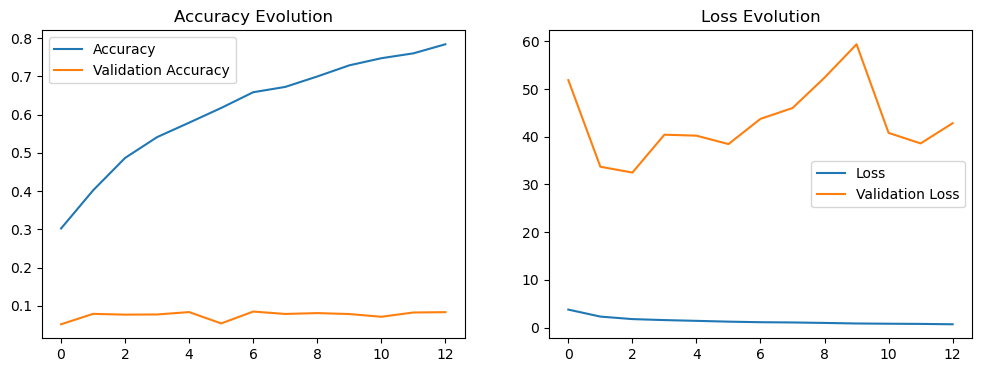

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)

import matplotlib.pyplot as plt

# Courbes de perte et de précision
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.show()


In [27]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
model = load_model('best_model.h5')
test_datagen = ImageDataGenerator(rescale=1./255)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_df['Path'] = test_df['Path'].str.replace('test/', '')  # Enlève 'test/' de chaque chemin

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='C:\\Users\\MFE\\OneDrive\\Unamur\\unamur-infom232-2023-2024\\test\\unknown',  # Chemin original
    x_col='Path',
    y_col=None,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode=None,
    batch_size=32,
    shuffle=False
)

predictions = model.predict(test_generator, steps=np.ceil(test_generator.n / test_generator.batch_size))
# Convertir les prédictions en labels
predicted_classes = np.argmax(predictions, axis=1)


predicted_labels_text = label_encoder.inverse_transform(predicted_classes)


results_df = pd.DataFrame({
    'Id': [filename.split('/')[-1] for filename in test_generator.filenames],
    'Disease (target)': predicted_labels_text
})

# Enregistrer les résultats dans un fichier CSV
results_df.to_csv('submission_cnns.csv', index=False)




Found 32921 validated image filenames.
1029/1029 [==============================] - 481s 468ms/step


In [49]:
print(results_df.head())


                                     Id     Disease (target)
0  e3cf77fc-db4e-4475-bc64-7d8d1b3b1bea   apple___apple_scab
1  9f93ce59-518f-4876-b0fa-9d8586b1f296   apple___apple_scab
2  339378ca-594b-44ef-99e9-f006032f22da   apple___apple_scab
3  d003f849-7e9b-4279-b762-20898d37c0e8  blueberry___healthy
4  acbee275-4053-4c5b-9bac-49d98fbea2e7   apple___apple_scab
